**Kwadratury**

In [30]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

**Zadanie 1.**

In [31]:
# Data
f = np.vectorize(lambda x: 4/(1+x**2))
true_value = np.pi
a, b = 0.0, 1.0

# Quadratures
def trapezoid(y, x):
    return scipy.integrate.trapezoid(y=y, x=x)

def simpson(y, x):
    return scipy.integrate.simpson(y=y, x=x)

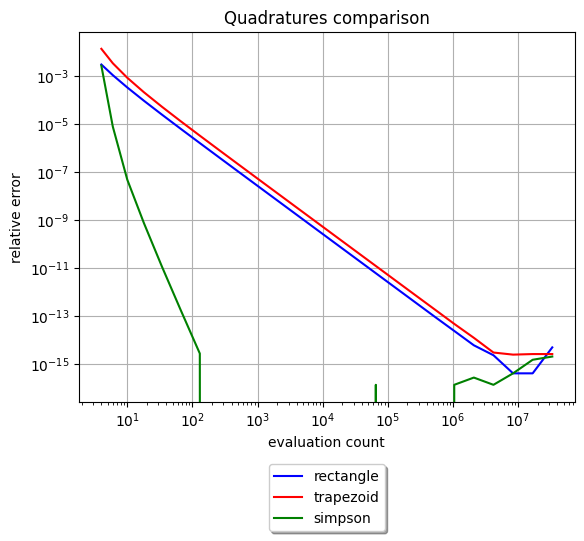

In [51]:
m_range = np.array(range(1, 26))

rectangle_values = []
trapezoid_values = []
simpson_values = []

# Calculations
for m in m_range:
    n = 2**m+1
    h = (b-a)/n
    x_rect = np.array([a+h*(i + 0.5) for i in range(n)])
    x_trap = np.linspace(a, b, num=n)
    x_simp = np.linspace(a, b, num=n)
    y_rect = f(x_rect)
    y_trap = f(x_trap)
    y_simp = f(x_simp)
    rectangle_values.append(np.sum(h*y_rect))
    trapezoid_values.append(trapezoid(y_trap, x_trap))
    simpson_values.append(simpson(y_simp, x_simp))

errors_rect = np.abs((np.array(rectangle_values) - true_value) / true_value)
errors_trap = np.abs((np.array(trapezoid_values) - true_value) / true_value)
errors_simp = np.abs((np.array(simpson_values) - true_value) / true_value)

# Plot
plt.title("Quadratures comparison")
plt.plot((2**m_range+1)/(b-a) + 1, errors_rect, color='blue', label='rectangle')
plt.plot((2**m_range+1)/(b-a) + 1, errors_trap, color='red', label='trapezoid')
plt.plot((2**m_range+1)/(b-a) + 1, errors_simp, color='green', label='simpson')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('evaluation count')
plt.ylabel('relative error')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()

In [49]:
Q = lambda T, i, j: np.log(T[j]/T[i]) / np.log(((b-a)/(2**j+1))/((b-a)/(2**i+1)))

p_rect = Q(errors_rect, 6, 15)
p_trap = Q(errors_trap, 6, 15)
p_simp = Q(errors_simp, 4, 6)


print(p_rect)
print(p_trap)
print(p_simp)

2.002474479459106
2.0049756290027023
6.213594335848067


**Zadanie 2.**

In [34]:
# abc